## Unsupervised Learning Eploration with the Sell your Phone dataset 

*get it? CellPhone!!!!*

By. Dr. Vukosi Marivate http://www.vima.co.za

This notebook takes data from a crowdsourced phone datataset. You can see the original google form here http://bitly.com/phonepricedata

Some preprocessing has been done in Google spreadsheets. Namely standardizing all the Brands of the phones. In this notebook I do not remove outliers. I do remove submissions without all of the information (you could resolve this with data imputation).

**Acknowledgements:** Jessica Nemasisi - Jessica helped with collection of the data and some initial analysis as part of ther Honours Degree Work. 

In [1]:
import pandas as pd

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [42]:
df = pd.read_excel("../data/sell_your_phone.xlsx")
df = df.dropna()
df = df.drop(['Timestamp'],axis=1)
brands = df.Brand.values
df = df.drop(['Brand'],axis=1)

#One Hot Encoding
cat_cols = ["Broken_Screen"]
df_continuous = pd.get_dummies(df,columns=cat_cols)
df_continuous.columns

Index([u'Age', u'Buying_Price', u'Camera', u'Battery', u'Screen_Size',
       u'Condition', u'Proposed_Sell_Price',
       u'Internal Storage Size in Gigabytes (GB)', u'Broken_Screen_No',
       u'Broken_Screen_Yes'],
      dtype='object')

In [43]:
#Some default stuff for my plotting
aspect_mult = 0.9
figsize(aspect_mult*16,aspect_mult*9)
linewidth = 3

In [44]:
df_continuous.head()

,Age,Buying_Price,Camera,Battery,Screen_Size,Condition,Proposed_Sell_Price,Internal Storage Size in Gigabytes (GB),Broken_Screen_No,Broken_Screen_Yes
0,8,160,5.0,24,4.5,7,2000.0,8.0,1,0
1,19,207,4.0,12,3.5,8,3000.0,5.0,1,0
2,9,250,2.0,4,3.5,5,200.0,2.0,1,0
3,19,650,2.0,14,3.5,9,400.0,1.0,1,0
4,13,699,2.0,10,3.2,7,450.0,4.0,1,0


In [45]:
df_continuous_normed = (df_continuous - df_continuous.mean()) / df_continuous.std()

## Mixture Models

In [46]:
from sklearn import mixture
from sklearn.manifold import TSNE

In [47]:
X = df_continuous_normed.values
reps = 3

In [48]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [49]:
log_likelihood = []
x_range = range(2,41)
for k in x_range:
    temp_wc = []
    for i in range(reps):
        clf = mixture.GaussianMixture(n_components=k, covariance_type='diag')
        clf.fit(X)
        temp_wc.append(clf.lower_bound_)
    log_likelihood.append(temp_wc)
log_likelihood= np.array(log_likelihood)

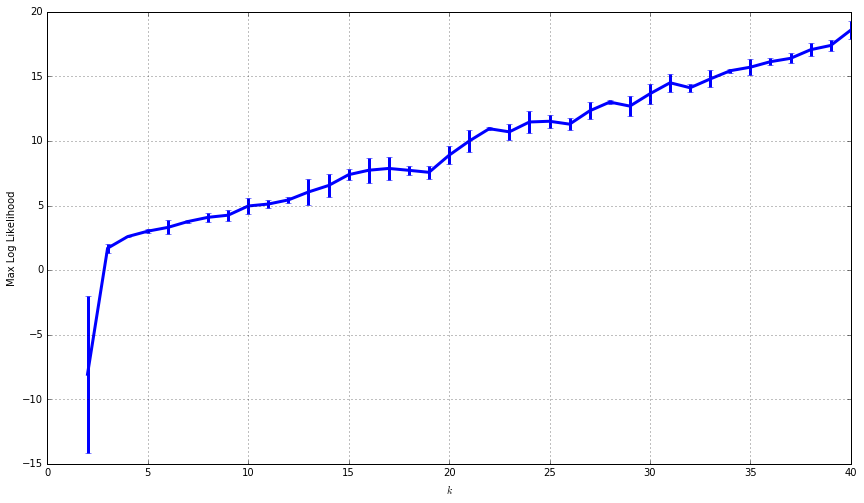

In [50]:
pyplot.errorbar(x_range,np.mean(log_likelihood,axis=1),
                yerr = np.std(log_likelihood,axis=1), linewidth=linewidth)
plt.ylabel("Max Log Likelihood")
plt.xlabel("$k$")
plt.grid()

In [51]:
k=20
clf = mixture.GaussianMixture(n_components=k, covariance_type='diag')
clf.fit(X)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
        means_init=None, n_components=20, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [52]:
cluster_labels = clf.predict(X)

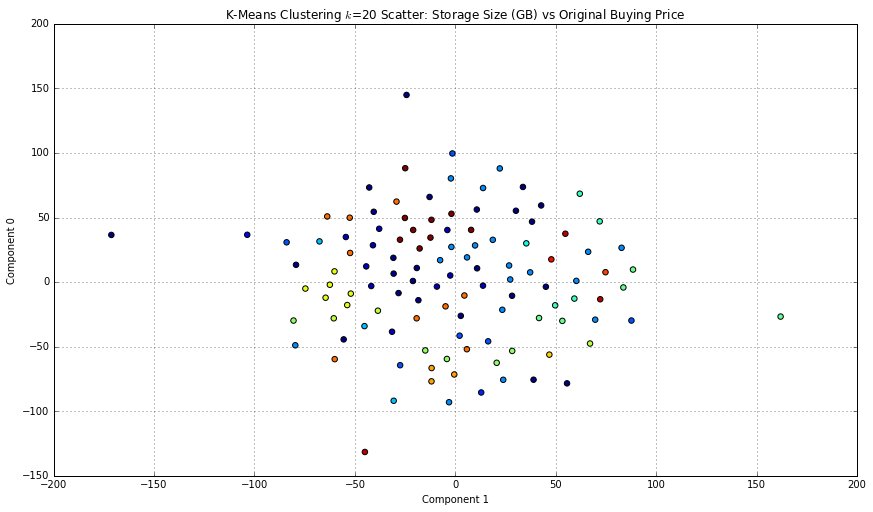

In [53]:
plt.scatter(X_tsne[:,0],X_tsne[:,1], c=cluster_labels,
            s=30,label=cluster_labels)
plt.title("K-Means Clustering $k$=" + str(k)+ " Scatter: Storage Size (GB) vs Original Buying Price")
plt.xlabel("Component 1")
plt.ylabel("Component 0")
plt.grid()

In [61]:
clf.weights_

array([ 0.20878845,  0.09335143,  0.00869565,  0.00869565,  0.05217328,
        0.16523322,  0.0260375 ,  0.00869565,  0.03478263,  0.04347824,
        0.04347891,  0.02606142,  0.05223068,  0.00869565,  0.02608694,
        0.0776444 ,  0.00869565,  0.00869565,  0.02607416,  0.07240482])

In [62]:
cluster = -55
print "Brand Buy Sell"
for i in range(len(cluster_labels)):
    if cluster_labels[i] == cluster:
        print brands[i], df.Buying_Price.iloc[i], df.Proposed_Sell_Price.iloc[i]

Brand Buy Sell


In [64]:
cluster = 15
print "Brand Buy Sell"
for i in range(len(cluster_labels)):
    if cluster_labels[i] == cluster:
        print brands[i], df.Buying_Price.iloc[i], df.Proposed_Sell_Price.iloc[i]

Brand Buy Sell
Samsung 1500 1450.0
Huawei 1700 1500.0
Azpen 2200 900.0
BlackBerry 2500 2000.0
Sony  2800 2500.0
BlackBerry 3000 2500.0
BlackBerry 3000 2500.0
BlackBerry 3000 2000.0
Sony  4000 3000.0


In [20]:
len(cluster_labels)

115